In [155]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

In [156]:
def ec_mov(x_p,t,a=0): #definir ecuaciones de movimiento
    r3_2=(x_p[0]**2+x_p[1]**2)**(1.5) #x_p representa (x,y,px,py)=(0,1,2,3), r3_2 es r^(3/2)
    desv=1+a
    dx=x_p[2]*desv
    dy=x_p[3]
    dpx=-(x_p[0]*desv)/(r3_2)
    dpy=-(x_p[1]*desv)/(r3_2)
    return array([dx,dy,dpx,dpy])

In [157]:
def rk4(ec,p_ini,x,args=0,h=0.01): #Runge Kutta de segundo orden
    if (x[1]-x[0])<=5*h:
        h=(x[1]-x[0])/10
    tiempos=arange(x[0],x[1]+h,h)
    sol=zeros((len(tiempos),len(p_ini)))
    sol[0,:]=p_ini
    if args==0:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i])
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h)
        #evaluando en el i-esimo
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4) #cero no esta involucrado, esta en cuenta en p_ini
    else:
        for i in xrange(len(tiempos)-1):
            k1=ec(sol[i,:],tiempos[i],args)
            k2=ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h,args)
            k3=ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h,args)
            k4=ec(sol[i,:]+h*k3,tiempos[i]+h,args)
            sol[i+1,:]=sol[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

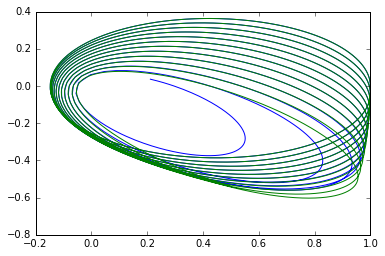

In [158]:
#mejor pas de integracion 0.001, y 0.0001
t,sol=rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,.01)
plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
t,sol=rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,0.0001)
plot(sol[:,0],sol[:,1])
show()

In [211]:
def Energia(x_p,a):
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E=0.5*(px*px*(1+a)+py*py)-((1+a)/sqrt(x**2+y**2))
    return E
def L_z(x_p): #momento angular
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L=x*py-y*px
    return L

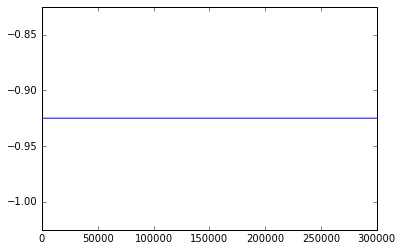

In [160]:
E=Energia(sol,0.05)
ylim([E[0]-0.1,E[0]+0.1])
plot(E)

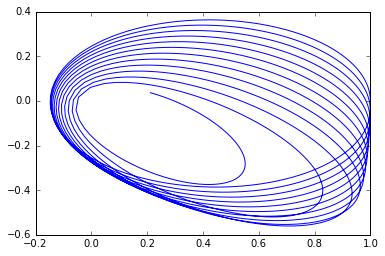

In [161]:
#mejor pas de integracion 0.001, y 0.0001
t,sol=rk4(ec_mov,[1,0,0,0.5],[0,30],0.05,.01)
plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
show()

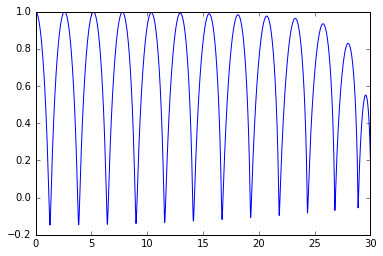

In [162]:
plot(t,sol[:,0])

In [283]:
sol[-1,:]

array([ 0.69403917, -0.75689834,  0.72054907,  0.63902774])

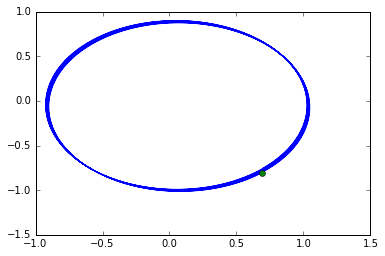

In [284]:
t=linspace(0,2*pi*10,5000) # de 0 a 30 con 1000 puntos, no depende de h
sol=odeint(ec_mov,sol[-1,:],t,args=(0.05,))
plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
plot(sol[-1,0],sol[-1,1],'o') #termina la simulacion
show()

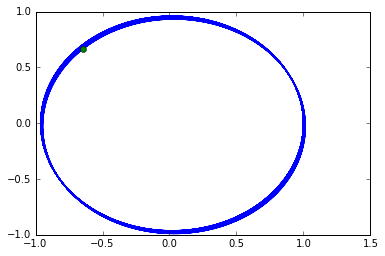

In [285]:
#utilizando odeint (metodos de integración) importando: from scipy.integrate import *, lo cual asegura una integracion entera sin puntos 
#intermedios, asegura convergecia
t=linspace(0,2*pi*50,5000) # de 0 a 30 (tiempo) con 1000 puntos, no depende de h, en 2*pi*300 es friccion numerica
alfa=(0.03)
sol=odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15) #rtol tolerancia de integrar de eun punto a otro
plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
#t=linspace(0,30,10) # de 0 a 30 con 1000 puntos, no depende de h
#sol=odeint(ec_mov,[1,0,0,0.5],t,args=(0.05,))#args=(0.05,) se toma en principio el 0.05, y de ahi e adelante se toma cuales seas
#plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
plot(sol[-1,0],sol[-1,1],'o') #termina la simulacion
show()

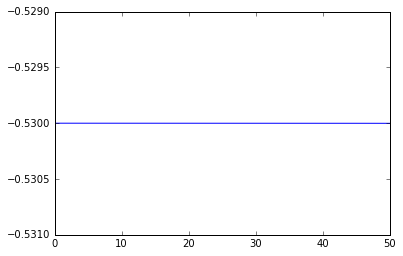

In [286]:
E=Energia(sol,alfa)
ylim([E[0]-0.001,E[0]+0.001])
plot(t/(2*pi),E)
show()

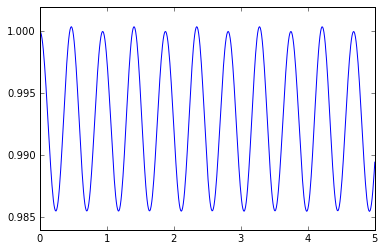

In [287]:
L=L_z(sol)
#ylim([L[0]-0.01,L[0]+0.01])
xlim([0,5])
plot(t/(2*pi),L)
show()

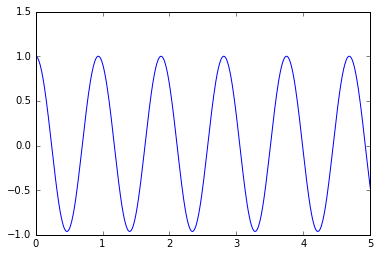

In [288]:
#oscilaciones en x
xlim([0,5])
plot(t/(2*pi),sol[:,0])

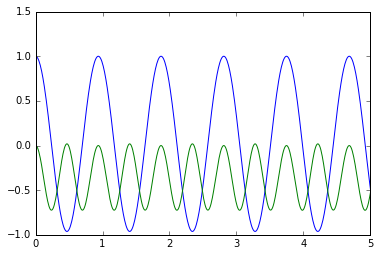

In [289]:
xlim([0,5])
plot(t/(2*pi),sol[:,0]) #oscilaciones
plot(t/(2*pi),(L-1)*50) #momento
show()

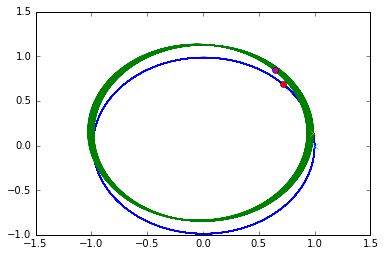

In [313]:
#utilizando odeint (metodos de integración) importando: from scipy.integrate import *, lo cual asegura una integracion entera sin puntos 
#intermedios, asegura convergecia
t=linspace(0,2*pi*50,5000) # de 0 a 30 (tiempo) con 1000 puntos, no depende de h, en 2*pi*300 es friccion numerica
alfa=(0.01)
sol=odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15) #rtol tolerancia de integrar de eun punto a otro
sol2=odeint(ec_mov,[0.99,sqrt(1-.99**2),0,1],t,args=(alfa,),rtol=1e-15) #rtol tolerancia de integrar de eun punto a otro, 0.99 es vx
plot(sol[:,0],sol[:,1]) #espacio de conf. de x1 vs x2
plot(sol2[:,0],sol2[:,1]) #espacio de conf. de x1 vs x2
plot(sol[-1,0],sol[-1,1],'o'),plot(sol[0,0],sol[0,1],'x') #termina la simulacion
plot(sol2[-1,0],sol2[-1,1],'o'),plot(sol2[0,0],sol2[0,1],'x') #termina la simulacion
show()

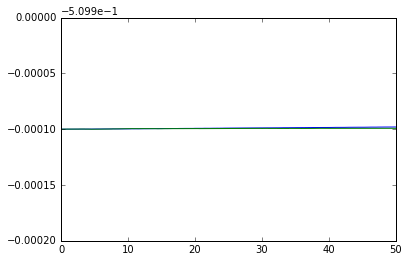

In [314]:
E=Energia(sol,alfa)
E2=Energia(sol2,alfa)
ylim([E[0]-0.0001,E[0]+0.0001])
plot(t/(2*pi),E)
plot(t/(2*pi),E2)
show()

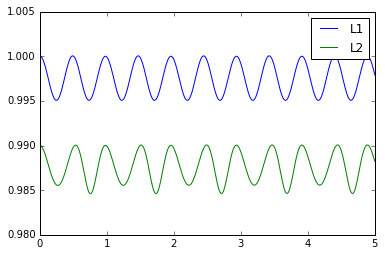

In [320]:
L=L_z(sol)
L2=L_z(sol2)
#ylim([L[0]-0.01,L[0]+0.01])
xlim([0,5])
plot(t/(2*pi),L,label='L1')
plot(t/(2*pi),L2,label='L2')
legend()
show()

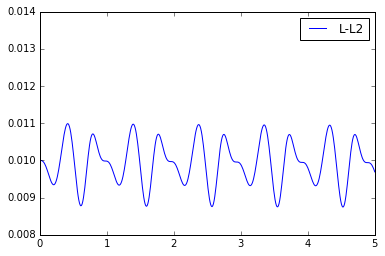

In [322]:
L=L_z(sol)
L2=L_z(sol2)
#ylim([L[0]-0.01,L[0]+0.01])
xlim([0,5])
#plot(t/(2*pi),L)
#plot(t/(2*pi),L2)
plot(t/(2*pi),L-L2,label='L-L2')
legend()
show()